In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# right-hand side of ODE

stretch = 100
def f(xi, X, gamma):
    f1 = stretch*X[1]/(1-np.power(xi,2))
    f2 = stretch*(-2*X[1]/(stretch*np.arctanh(xi)) + 2*(X[2] - gamma)*X[0])/(1-np.power(xi,2))
    f3 = stretch*X[3]/(1-np.power(xi,2))
    f4 = stretch*(-2*X[3]/(stretch*np.arctanh(xi)) + np.power(X[0],2))/(1-np.power(xi,2))
    return np.array([f1, f2, f3, f4])

# interval of solution and number of steps
xii, xif = 0, 0.1
steps = 1000
dxi = (xif - xii)/steps
xiinterv = np.linspace(xii, xif, steps, endpoint=True)

# single step of RK4
def rk4step(xi, X, gamma):
    k1 = dxi*f(xi, X, gamma)
    k2 = dxi*f(xi + dxi/2, X + k1/2, gamma)
    k3 = dxi*f(xi + dxi/2, X + k2/2, gamma)
    k4 = dxi*f(xi + dxi, X + k3, gamma)
    return X + (k1 + 2*k2 + 2*k3 + k4)/6

def rk4(Xbc, w):
    # initialize the arrays
    Xs = np.zeros((4, steps))

    # boundary conditions at xi = xii
    Xs[..., 0] = Xbc

    # perform RK4
    for step in np.arange(1, steps):
        xinow = xiinterv[step]
        Xs[..., step] = rk4step(xinow, Xs[..., step - 1], gamma)

    return Xs

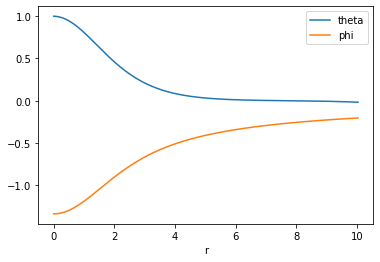

In [76]:
# Reproducing solution from Doddy's papper
gamma = -0.6920
phi0 = -1.3415238997
Xbc = np.array([1, 0, phi0, 0])

Xs = rk4(Xbc, gamma)
plt.plot(stretch*np.arctanh(xiinterv), Xs[0].T, label = "theta")
plt.plot(stretch*np.arctanh(xiinterv), Xs[2].T, label = "phi")
plt.xlabel("r")
plt.legend()